In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.models import load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
# Define the folder path where the CSV files are located
folder_path = r'C:\Users\33766\Desktop\mlipproject\data'
# folder_path = r'C:\Users\33766\Desktop\mlipproject\data'

# Use the glob module to find all CSV files in the folder
csv_files = glob.glob(f'{folder_path}/*.csv')

# Define the column names that you want to keep
columns_to_keep = ['annee_numero_de_tirage', 'boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5', 'etoile_1', 'etoile_2']

# Initialize an empty DataFrame to hold data from all files
df = pd.DataFrame()

# Iterate over each CSV file
for file in csv_files:
    # Read the CSV file, only keeping specified columns and setting encoding, separator, and index column parameters
    df_temp = pd.read_csv(file, encoding='ISO-8859-1', sep=';', index_col=False, usecols=columns_to_keep)
    # Append the data to the combined DataFrame
    df = pd.concat([df, df_temp], ignore_index=True)

# Sort the combined DataFrame by 'annee_numero_de_tirage' in ascending order
df.sort_values(by='annee_numero_de_tirage', inplace=True)
# Reset the index of the combined DataFrame
df.reset_index(drop=True, inplace=True)


In [3]:
df

,annee_numero_de_tirage,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,2004001,32,16,29,41,36,9,7
1,2004002,13,50,47,7,39,2,5
2,2004003,37,19,18,14,31,5,4
3,2004004,39,37,4,7,33,5,1
4,2004005,44,47,15,28,24,4,5
...,...,...,...,...,...,...,...,...
1703,20244006,50,27,28,48,44,7,12
1704,20244007,48,23,14,50,39,12,3
1705,20244008,32,19,41,8,42,12,9
1706,20244009,10,27,5,30,19,6,5


In [4]:
# 计算基本统计量
stats = df.describe()
print(stats)

       annee_numero_de_tirage      boule_1      boule_2      boule_3  \
count            1.708000e+03  1708.000000  1708.000000  1708.000000   
mean             6.468151e+06    25.564403    24.980679    25.938525   
std              7.828967e+06    14.417166    14.335759    14.163009   
min              2.004001e+06     1.000000     1.000000     1.000000   
25%              2.011068e+06    13.000000    13.000000    14.000000   
50%              2.015096e+06    26.000000    25.000000    26.000000   
75%              2.019329e+06    38.000000    38.000000    38.000000   
max              2.024401e+07    50.000000    50.000000    50.000000   

           boule_4      boule_5     etoile_1     etoile_2  
count  1708.000000  1708.000000  1708.000000  1708.000000  
mean     25.400468    25.469555     6.075527     5.966628  
std      14.518277    14.390679     3.251538     3.250803  
min       1.000000     1.000000     1.000000     1.000000  
25%      13.000000    13.000000     3.000000     3.

#### 每个球频率

In [5]:
# 分开绘制主球号的频率分布
for i in range(1, 6):  # 对于主球号
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=df[f'boule_{i}'], nbinsx=50, marker_color='blue', name=f'boule_{i}'))
    fig.update_layout(
        title_text=f'Frequency of boule_{i}',
        xaxis_title_text='Number',
        yaxis_title_text='Frequency',
        bargap=0.2,  # 间距
    )
    fig.show()

# 分开绘制星号的频率分布
for i in range(1, 3):  # 对于星号
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=df[f'etoile_{i}'], nbinsx=12, marker_color='red', name=f'etoile_{i}'))
    fig.update_layout(
        title_text=f'Frequency of etoile_{i}',
        xaxis_title_text='Number',
        yaxis_title_text='Frequency',
        bargap=0.2,  # 间距
    )
    fig.show()


#### 啥也不是热力图

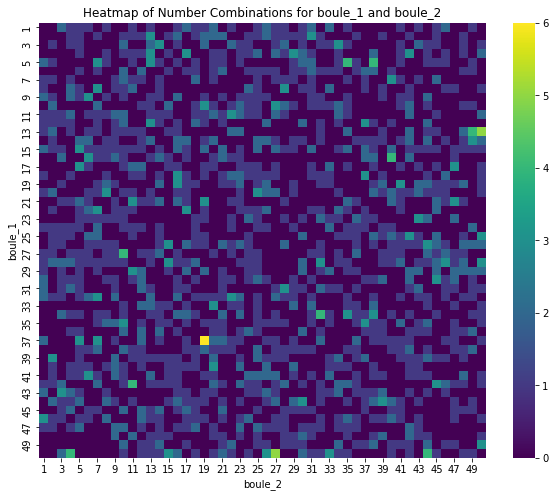

In [6]:
# 创建数字组合的频率矩阵
cross_tab = pd.crosstab(index=df['boule_1'], columns=df['boule_2'])

# 绘制热图
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, cmap='viridis')
plt.title('Heatmap of Number Combinations for boule_1 and boule_2')
plt.show()


##### 相关性矩阵

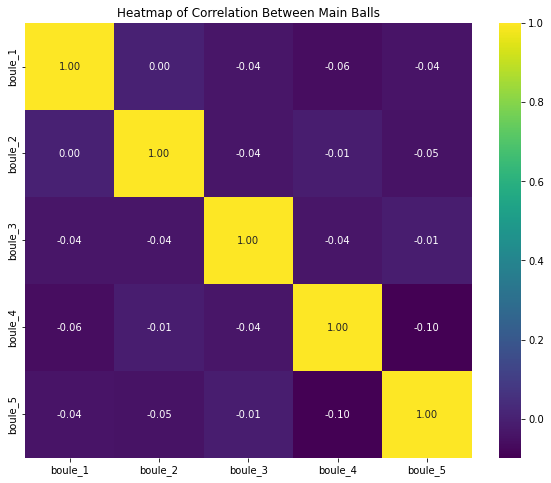

In [7]:
cross_tab = pd.crosstab(index=df['boule_1'], columns=[df['boule_2'], df['boule_3'], df['boule_4'], df['boule_5']])

# 计算五个主球之间的相关性矩阵
corr_matrix = df[['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']].corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap of Correlation Between Main Balls')
plt.show()

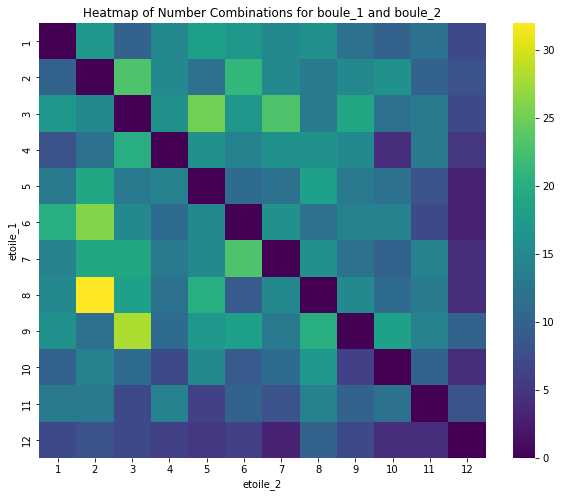

In [8]:
# 创建数字组合的频率矩阵
cross_tab = pd.crosstab(index=df['etoile_1'], columns=df['etoile_2'])

# 绘制热图
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, cmap='viridis')
plt.title('Heatmap of Number Combinations for boule_1 and boule_2')
plt.show()


#### 绘制每年平均号码的变化趋势

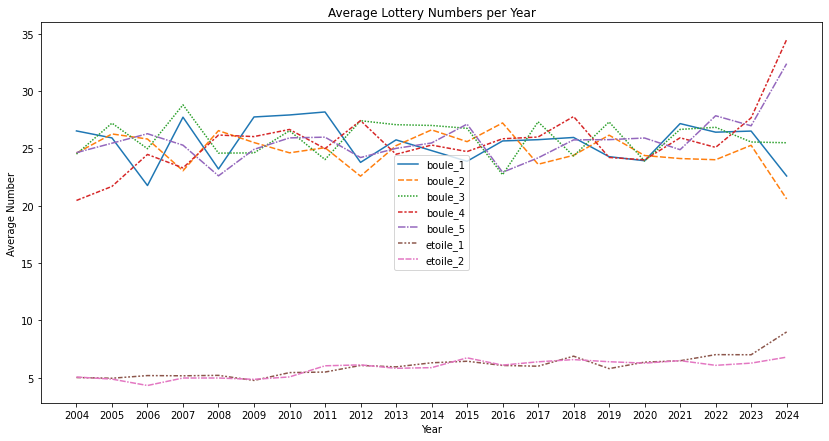

In [9]:
# 假设 'annee_numero_de_tirage' 是年份+编号的格式，先提取年份
df['year'] = df['annee_numero_de_tirage'].apply(lambda x: str(x)[:4])

# 计算每年的平均号码
average_numbers_per_year = df.groupby('year').mean()

# 绘制每年平均号码的变化趋势
plt.figure(figsize=(14, 7))
sns.lineplot(data=average_numbers_per_year[['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5', 'etoile_1', 'etoile_2']])
plt.title('Average Lottery Numbers per Year')
plt.ylabel('Average Number')
plt.xlabel('Year')
plt.show()


#### 绘制每年最多出现号码的变化趋势

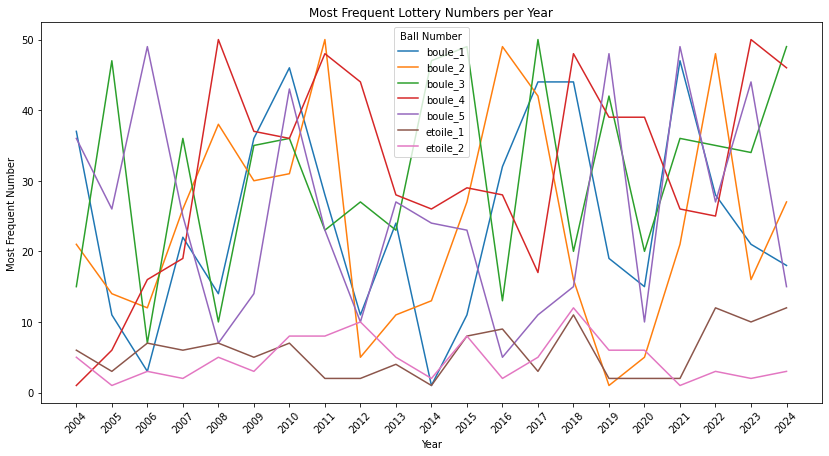

In [10]:
# 初始化存储每年最多出现号码的 DataFrame
most_frequent_numbers_per_year = pd.DataFrame()

# 对每个球号进行操作
for ball in ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5', 'etoile_1', 'etoile_2']:
    # 初始化一个列表来存储每年最频繁的数字
    most_frequent_numbers = []
    
    # 对每个年份进行操作
    for year in df['year'].unique():
        # 筛选当前年份的数据
        year_df = df[df['year'] == year]
        
        # 计算当前年份当前球号的数字频率，并找到频率最高的数字
        most_frequent_number = year_df[ball].value_counts().idxmax()
        
        # 将最频繁的数字添加到列表中
        most_frequent_numbers.append(most_frequent_number)
    
    # 将每年最频繁的数字加入到 DataFrame 中
    most_frequent_numbers_per_year[ball] = most_frequent_numbers

# 设置年份为索引
most_frequent_numbers_per_year.index = df['year'].unique()

# 绘制每年最频繁出现的数字的变化趋势
plt.figure(figsize=(14, 7))
for ball in most_frequent_numbers_per_year.columns:
    sns.lineplot(data=most_frequent_numbers_per_year[ball], label=ball)
plt.title('Most Frequent Lottery Numbers per Year')
plt.ylabel('Most Frequent Number')
plt.xlabel('Year')
plt.legend(title='Ball Number')
plt.xticks(rotation=45)  # 旋转 x 轴标签以便更好地显示
plt.show()


#### 检测异常值

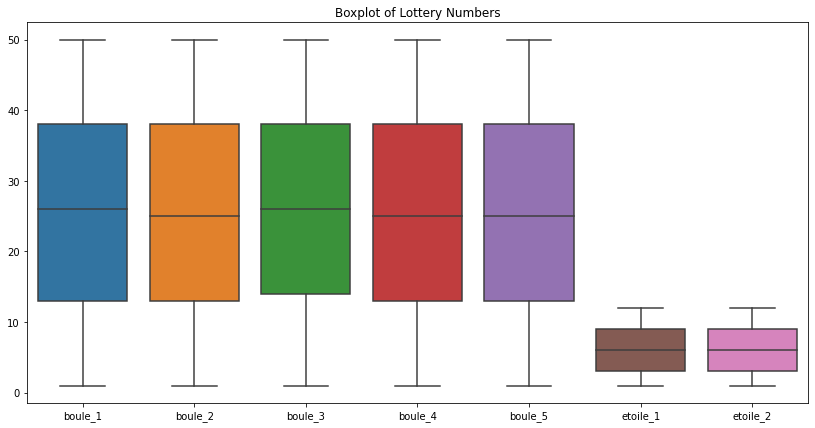

In [11]:
# 使用箱线图来检测每个数字的潜在异常值
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5', 'etoile_1', 'etoile_2']])
plt.title('Boxplot of Lottery Numbers')
plt.show()


#### 标准化 划分训练集 测试集

In [12]:
df = df.drop(['annee_numero_de_tirage'
              ,'year'
             ], axis=1)
df

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,32,16,29,41,36,9,7
1,13,50,47,7,39,2,5
2,37,19,18,14,31,5,4
3,39,37,4,7,33,5,1
4,44,47,15,28,24,4,5
...,...,...,...,...,...,...,...
1703,50,27,28,48,44,7,12
1704,48,23,14,50,39,12,3
1705,32,19,41,8,42,12,9
1706,10,27,5,30,19,6,5


In [13]:
#标准化
scaler = StandardScaler().fit(df.values)
transformed_dataset = scaler.transform(df.values)
transformed_df = pd.DataFrame(data=transformed_dataset, index=df.index)
print(transformed_df.head)

number_of_rows = df.values.shape[0]
window_length = 5
number_of_features = df.values.shape[1]

<bound method NDFrame.head of              0         1         2         3         4         5         6
0     0.446515 -0.626636  0.216223  1.074790  0.731969  0.899676  0.317975
1    -0.871744  1.745750  1.487512 -1.267771  0.940498 -1.253782 -0.297438
2     0.793425 -0.417308 -0.560675 -0.785479  0.384420 -0.330872 -0.605144
3     0.932190  0.838661 -1.549455 -1.267771  0.523440 -0.330872 -1.528263
4     1.279100  1.536422 -0.772557  0.179105 -0.102148 -0.638509 -0.297438
...        ...       ...       ...       ...       ...       ...       ...
1703  1.695392  0.140900  0.145596  1.557082  1.288047  0.284402  1.856507
1704  1.556628 -0.138204 -0.843184  1.694880  0.940498  1.822586 -0.912850
1705  0.446515 -0.417308  1.063749 -1.198873  1.149028  1.822586  0.933388
1706 -1.079891  0.140900 -1.478828  0.316903 -0.449697 -0.023235 -0.297438
1707 -0.871744  1.187541  0.074969 -0.165390 -0.380188  0.899676 -0.297438

[1708 rows x 7 columns]>


In [14]:
# 划分训练集、测试集和验证集
train_size = int(number_of_rows * 0.8)
test_size = int((number_of_rows - train_size) * 0.5)  # 50% 划分给测试集，50% 划分给验证集

train_data, test_val_data = transformed_df.iloc[:train_size], transformed_df.iloc[train_size:]
test_data, val_data = train_test_split(test_val_data, test_size=test_size, shuffle=False)

# 构建训练集和标签集
train = np.empty([train_size - window_length, window_length, number_of_features], dtype=float)
label = np.empty([train_size - window_length, number_of_features], dtype=float)

for i in range(0, train_size - window_length):
    train[i] = train_data.iloc[i:i+window_length, 0:number_of_features]
    label[i] = train_data.iloc[i+window_length:i+window_length+1, 0:number_of_features]

# 构建测试集和标签集
test = np.empty([test_size - window_length, window_length, number_of_features], dtype=float)
test_label = np.empty([test_size - window_length, number_of_features], dtype=float)

for i in range(0, test_size - window_length):
    test[i] = test_data.iloc[i:i+window_length, 0:number_of_features]
    test_label[i] = test_data.iloc[i+window_length:i+window_length+1, 0:number_of_features]

# 构建验证集和标签集
val = np.empty([len(val_data) - window_length, window_length, number_of_features], dtype=float)
val_label = np.empty([len(val_data) - window_length, number_of_features], dtype=float)

for i in range(0, len(val_data) - window_length):
    val[i] = val_data.iloc[i:i+window_length, 0:number_of_features]
    val_label[i] = val_data.iloc[i+window_length:i+window_length+1, 0:number_of_features]


#### 建立模型

In [15]:
#模型
batch_size = 25 
if os.path.exists('/Users/dantashashou/Downloads/euromillions/euromillions.h5'):
    model = load_model('/Users/dantashashou/Downloads/euromillions/euromillions.h5')
else:
    model = Sequential()
    model.add(LSTM(32, input_shape=(window_length, number_of_features), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(number_of_features))

    # #自定义损失函数，添加约束惩罚使号码不重复
    # def custom_loss(y_true, y_pred):
    #     mse = MeanSquaredError()(y_true, y_pred)  # 均方误差作为基础损失

    #     # 添加对规则的约束惩罚项
    #     penalty = tf.constant(1e6)  # 惩罚项的权重，可以根据实际情况调整

    #     # 检查前五个主球是否有重复
    #     repeated_boule_penalty = penalty * tf.reduce_sum(tf.square(tf.reduce_sum(tf.abs(y_pred[:, :5] - tf.expand_dims(y_pred[:, :5], 1)), axis=-1) - 1.0))

    #     # 检查后两个星号是否有重复
    #     repeated_etoile_penalty = penalty * tf.reduce_sum(tf.square(tf.reduce_sum(tf.abs(y_pred[:, 5:7] - tf.expand_dims(y_pred[:, 5:7], 1)), axis=-1) - 1.0))

    #     return mse + repeated_boule_penalty + repeated_etoile_penalty

        


    #模型编译和训练
    model.compile(loss='mse', optimizer='rmsprop')
    # model.compile(loss=custom_loss, optimizer='rmsprop')
    history = model.fit(train, label, validation_data=(val, val_label), batch_size=64, epochs=200)

    # 保存模型
    # model.save('/Users/dantashashou/Downloads/euromillions/euromillions.h5')


Epoch 1/200
22/22 [==============================] - 3s 26ms/step - loss: 0.9957 - val_loss: 1.0260
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 0.9926 - val_loss: 1.0266
Epoch 3/200
22/22 [==============================] - 0s 5ms/step - loss: 0.9893 - val_loss: 1.0265
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 0.9887 - val_loss: 1.0267
Epoch 5/200
22/22 [==============================] - 0s 10ms/step - loss: 0.9869 - val_loss: 1.0274
Epoch 6/200
22/22 [==============================] - 0s 5ms/step - loss: 0.9883 - val_loss: 1.0268
Epoch 7/200
22/22 [==============================] - 0s 5ms/step - loss: 0.9870 - val_loss: 1.0262
Epoch 8/200
22/22 [==============================] - 0s 5ms/step - loss: 0.9848 - val_loss: 1.0269
Epoch 9/200
22/22 [==============================] - 0s 4ms/step - loss: 0.9850 - val_loss: 1.0273
Epoch 10/200
22/22 [==============================] - 0s 4ms/step - loss: 0.9842 - val_loss: 1.0266
Epoch 1

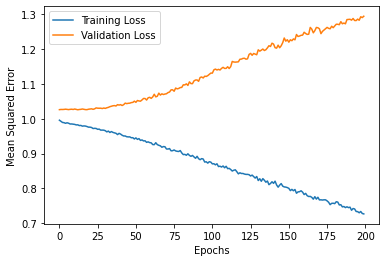

In [16]:
# 模型评估可视化
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Root Mean Squared Error (RMSE): 21.825400562794457


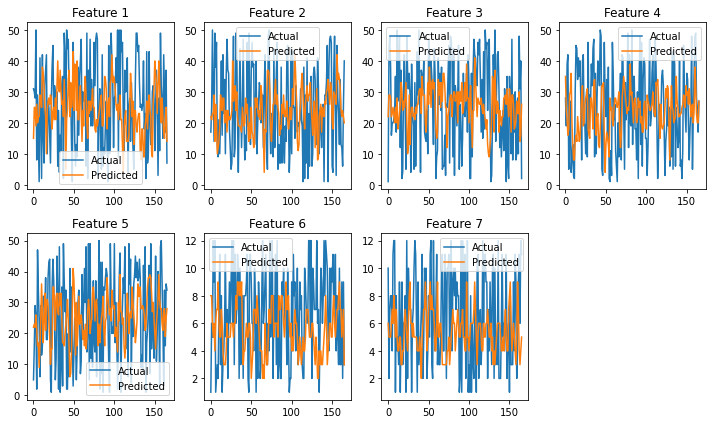

In [17]:
# 模型预测
scaled_predicted_output = model.predict(test)
predicted_output = scaler.inverse_transform(scaled_predicted_output).astype(int)

test_label_original = scaler.inverse_transform(test_label)

# 计算均方根误差
rmse = np.sqrt(mean_squared_error(test_label, predicted_output))

print("Root Mean Squared Error (RMSE):", rmse)

# 可视化预测结果
plt.figure(figsize=(10, 6))
for i in range(number_of_features):
    plt.subplot(2, 4, i+1)
    plt.plot(test_label_original[:, i], label='Actual')
    plt.plot(predicted_output[:, i], label='Predicted')
    plt.title(f'Feature {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()

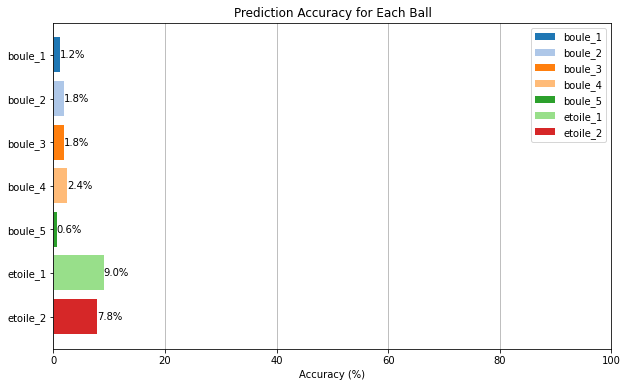

In [18]:
# 计算每个球的预测准确率
ball_names = ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5', 'etoile_1', 'etoile_2']
accuracies = []
for i in range(number_of_features):
    correct_predictions = np.sum(test_label_original[:, i] == predicted_output[:, i])
    total_predictions = len(test_label_original[:, i])
    accuracy = correct_predictions / total_predictions * 100
    accuracies.append(accuracy)

# 绘制圆环图
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20.colors
for i, (accuracy, color) in enumerate(zip(accuracies, colors)):
    plt.barh(i, accuracy, color=color, label=ball_names[i])
    plt.text(accuracy, i, f'{accuracy:.1f}%', va='center')
plt.xlim(0, 100)
plt.yticks(range(number_of_features), ball_names)
plt.xlabel('Accuracy (%)')
plt.title('Prediction Accuracy for Each Ball')
plt.grid(axis='x')
plt.legend()
plt.gca().invert_yaxis()  # 翻转y轴，使得球的顺序与输入的顺序一致
plt.show()




In [19]:
# 预测部分
to_predict = df.iloc[-5:]
scaled_to_predict = scaler.transform(to_predict)

scaled_predicted_output_1 = model.predict(np.array([scaled_to_predict]))
data = scaler.inverse_transform(scaled_predicted_output_1).astype(int)
predict = pd.DataFrame(data, columns=['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5', 'etoile_1', 'etoile_2'])

predict

c:\Users\33766\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,24,24,20,34,24,5,9
